In [1]:
%matplotlib inline

In [2]:
import requests
import pandas as pd
import matplotlib

matplotlib.style.use('ggplot')

In [3]:
r = requests.get('http://m.au.ufc.com/fm/api/event/detail/778.json')

In [4]:
r.json().keys()

dict_keys(['GMT', 'Attendance', 'Organization', 'statid', 'Date', 'Time', 'Location', 'FightCard', 'Name', 'Status'])

In [5]:
r.json().get('Status')

'Active'

In [6]:
r.json().get('Attendance')

In [7]:
r.json().get('Name')

'UFC 200: Tate vs Nunes'

In [8]:
r.json().get('statid')

'778'

In [9]:
r.json().get('Location')

{'City': 'Las Vegas',
 'Country': 'USA',
 'State': 'Nevada',
 'Venue': 'T-Mobile Arena'}

In [10]:
r.json().get('Time')

'18:30:00'

In [11]:
r.json().get('Date')

'2016-07-09'

In [12]:
r.json().get('GMT')

'2016-07-09T22:30Z'

In [13]:
r.json().get('Organization')

{'Name': 'Ultimate Fighting Championship', 'OrganizationID': '1'}

In [14]:
len(r.json().get('FightCard'))

12

In [15]:
r.json().get('FightCard')[1].keys()

dict_keys(['Fighters', 'statid', 'Accolade', 'Result', 'Stats', 'RuleSet', 'FightOrder', 'WeightClass', 'Referee'])

In [16]:
r.json()['FightCard'][1]['statid']

'6160'

In [17]:
pd.DataFrame.from_dict(r.json()['FightCard'][1]['Fighters'])

,Age,Born,DOB,FightingOutOf,Height,KOOfTheNight,MMAID,Name,Outcome,PerformanceOfTheNight,Reach,Record,Stance,SubmissionOfTheNight,UFCLink,UFCWeightClass,WeighIn,Weight,statid
0,38,"{'State': 'South Dakota', 'City': 'Webster', '...",1977-07-12,"{'State': 'Saskatchewan', 'City': 'Regina', 'C...",75,None,102665,"{'FirstName': 'Brock', 'NickName': None, 'Last...","{'Outcome': 'Win', 'OutcomeID': '1'}",None,81.0,"{'Losses': '3', 'Draws': '0', 'Wins': '6', 'No...",Orthodox,None,http://www.ufc.com/fighter/Brock-Lesnar,"{'Abbreviation': 'HW', 'WeightClassID': '1', '...",None,265,305
1,42,"{'State': None, 'City': 'Auckland', 'Country':...",1974-03-23,"{'State': None, 'City': 'Auckland', 'Country':...",70,None,117463,"{'FirstName': 'Mark', 'NickName': 'Super Samoa...","{'Outcome': 'Loss', 'OutcomeID': '2'}",None,72.0,"{'Losses': '11', 'Draws': '1', 'Wins': '12', '...",Orthodox,None,http://www.ufc.com/fighter/mark-hunt,"{'Abbreviation': 'HW', 'WeightClassID': '1', '...",None,265,735


In [52]:
df = pd.DataFrame(r.json()['FightCard'][1]['Stats'], 
                  index = ['{FirstName} {LastName}'.format(**f['Name'])
                           for f in r.json()['FightCard'][1]['Fighters']], 
                  dtype = 'float64')
df.drop(['statid'], axis=1, inplace=True)
df

,KnockDowns,Passes,Reversals,SigBodyStrikesAttempted,SigBodyStrikesLanded,SigHeadStrikesAttempted,SigHeadStrikesLanded,SigLegStrikesAttempted,SigLegStrikesLanded,SigStrikesAccuracy,SigStrikesAttempted,SigStrikesLanded,SubmissionsAttempted,TakedownsAccuracy,TakedownsAttempted,TakedownsLanded,TotalStrikesAttempted,TotalStrikesLanded
Brock Lesnar,0.0,4.0,0.0,2.0,2.0,71.0,47.0,2.0,2.0,68.00,75.0,51.0,0.0,50.0,8.0,4.0,167.0,137.0
Mark Hunt,0.0,0.0,0.0,1.0,1.0,31.0,12.0,0.0,0.0,40.63,32.0,13.0,0.0,0.0,0.0,0.0,68.0,46.0


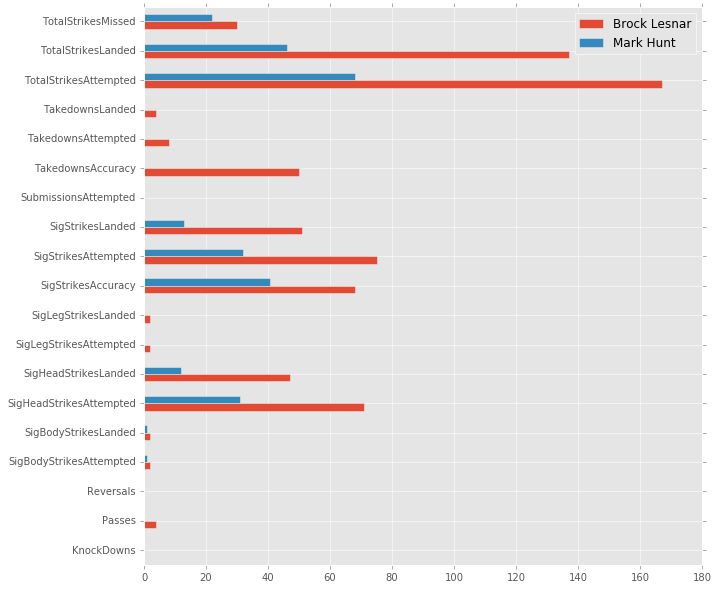

In [63]:
df.T.plot.barh(figsize=(10, 10))

In [54]:
df['TotalStrikesMissed'] = df['TotalStrikesAttempted']- df['TotalStrikesLanded']

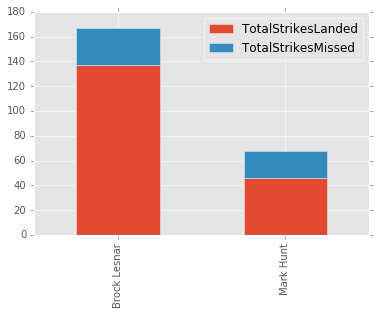

In [60]:
df[['TotalStrikesLanded', 'TotalStrikesMissed']].plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1100b7b00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110103ac8>], dtype=object)

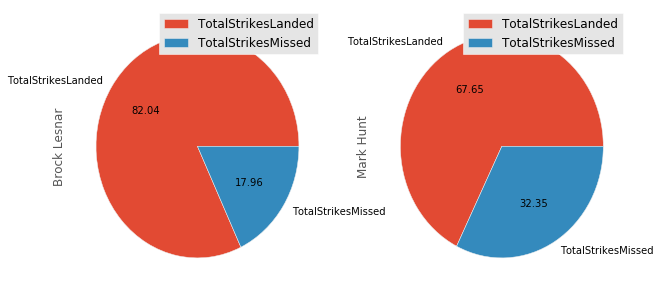

In [91]:
df[['TotalStrikesLanded', 'TotalStrikesMissed']].T.plot.pie(subplots=True, autopct='%.2f', figsize=(10, 5))